In [67]:
csv_data = """
Step,baseline,noK,k4,k256,k16,k64
1,,0.465147913,0.596695243,0.530980297,,0.522192538
2,,0.456692457,0.605377333,0.508527833,0.539898015,0.510962427
3,,0.458951324,0.562562226,0.496238011,0.521148834,0.496123403
4,,0.449245811,0.55057216,0.490136366,0.513614792,0.494004428
5,,0.447573572,0.534661528,0.504609031,0.509783129,0.486640781
6,,0.446472913,0.530117151,0.495817922,0.50935008,0.490001172
7,,0.446137518,0.524824359,0.499814193,0.507316854,0.479766876
8,,0.441662192,0.519020693,0.493244388,0.512414275,0.479464263
9,,0.432744712,0.525351644,0.48458587,0.51613065,0.481688797
10,,0.431480706,0.520815325,0.484211396,0.50435278,0.481493443
11,,0.436206162,0.518343293,0.480216395,0.499872723,0.472693443
12,,0.432069749,0.51357796,0.480750254,0.497616896,0.478483111
13,,0.430126518,0.508547455,0.472773918,0.498042436,0.473685175
14,,0.424819142,0.512493993,0.475289267,0.49900858,0.475515902
15,,0.426077157,0.513160869,0.468488034,0.498208441,0.470430672
16,0.572137849,0.425294191,0.506686534,0.473813736,0.493480585,0.475566775
17,0.553294881,0.426450849,0.509285306,0.469401456,0.490419907,0.469111621
18,0.572088982,0.426479787,0.505795015,0.469043064,0.491534894,0.467196137
19,0.587361458,0.428773522,0.507565916,0.471246813,0.493105418,0.464250803
20,0.580431108,0.424101412,0.502349991,0.463619952,0.495580956,0.466862619
21,0.566204518,0.423738092,0.504698799,0.465163074,0.492699229,0.464300215
22,0.57873866,0.427296996,0.502501002,0.467481741,0.492339454,0.467841625
23,0.553977244,0.418431759,0.503864278,0.46411863,0.48996906,0.456481636
24,0.552510292,0.421869069,0.502934913,0.466359171,0.490873318,0.464573413
25,0.572510237,0.423611134,0.501446825,0.467388424,0.485584229,0.458155125
26,0.550258297,0.41721642,,0.473232186,0.48779266,0.459149957
27,0.549826996,0.415216058,,0.463778806,0.487899959,0.456725389
28,0.569842704,0.426254481,,0.467688919,0.488056434,0.44878906
29,0.564380903,0.421391398,,0.469601887,0.483671759,0.450873971
30,0.550165157,0.424040109,,0.470577952,0.487993357,0.451151192
31,0.557046162,0.426051229,,0.471047634,0.486727211,0.450969428
32,0.575477486,0.425138414,,0.468210041,0.486143242,0.449748665
33,0.54736186,0.428570926,,0.466530857,0.484922921,0.449601978
34,0.549773653,0.425769418,,0.465540305,0.48842739,0.443607718
35,0.580208591,,,0.466067436,0.479457072,0.448398262
36,0.570409614,,,0.464180325,0.484581437,0.447614878
37,0.577078447,,,0.469203658,0.480797283,0.44413501
38,0.557857483,,,0.469553516,0.485017735,0.443233371
39,0.550414328,,,0.469915468,0.481361792,0.441841364
40,0.548506685,,,0.464556995,0.481683173,0.445182174
41,0.546401268,,,0.466863249,0.481229716,0.441391587
42,0.555786211,,,0.466895835,0.481846851,0.441592813
43,0.547663269,,,0.466678172,0.479059823,
44,0.55638326,,,0.463412662,0.479480601,
45,0.558590377,,,0.463391131,0.48022863,
46,0.562175945,,,0.468422009,0.48086159,
47,0.577938936,,,0.466631084,0.480218942,
48,0.559873063,,,0.466789053,0.478372386,
49,0.548029257,,,0.462217037,0.476866085,
50,0.549854928,,,0.464863783,0.479084071,
51,,,,0.467683141,0.479829888,
52,,,,0.467115953,0.476950668,
53,,,,0.466430505,0.476614339,
54,,,,0.462977932,0.478346819,
55,,,,0.470091079,0.478991455,
56,,,,0.465821487,0.476034351,
57,,,,0.470645818,0.477475179,
58,,,,0.464157442,0.478141272,
59,,,,0.463121099,0.477975144,
60,,,,0.466725099,0.477834237,
61,,,,0.465162249,0.478592407,
62,,,,0.469857466,0.47839867,
63,,,,0.464063052,0.478430845,
64,,,,0.465548438,0.476714368,
65,,,,0.465019568,0.480710977,
66,,,,0.465405608,0.480018564,
67,,,,0.466437944,0.477197279,
68,,,,0.463676507,0.475884827,
69,,,,0.46747006,0.475492289,
70,,,,0.463300519,0.471285911,
71,,,,0.465167795,0.472602506,
"""

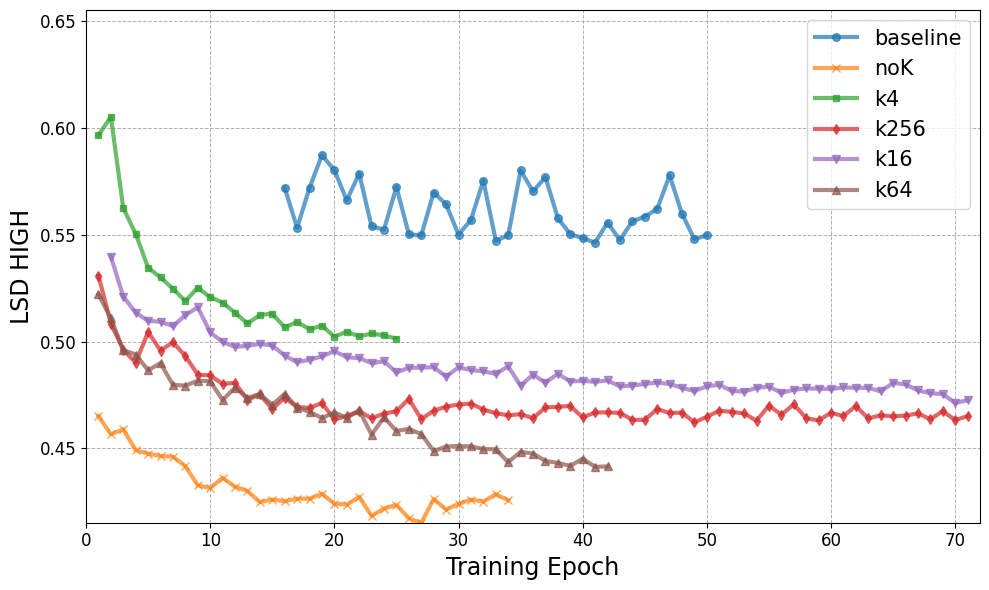

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

# The data provided


# Load the data into a pandas dataframe
df = pd.read_csv(StringIO(csv_data))

# Drop rows with all NaN values in the metric columns
df_cleaned = df.dropna(how="all", subset=['baseline', 'noK', 'k4', 'k256', 'k16', 'k64'])

# Plot the data with enhanced readability
plt.figure(figsize=(10, 6))

markersize = 5.5
linewidth = 3

# Adjusting marker size, line width, line style, and adding transparency
plt.plot(df_cleaned['Step'], df_cleaned['baseline'], label='baseline', marker='o', markersize=markersize, linewidth=linewidth, alpha=0.7, linestyle='-')
plt.plot(df_cleaned['Step'], df_cleaned['noK'], label='noK', marker='x', markersize=markersize, linewidth=linewidth, alpha=0.7, linestyle='-')
plt.plot(df_cleaned['Step'], df_cleaned['k4'], label='k4', marker='s', markersize=markersize-0.5, linewidth=linewidth, alpha=0.7, linestyle='-')
plt.plot(df_cleaned['Step'], df_cleaned['k256'], label='k256', marker='d', markersize=markersize, linewidth=linewidth, alpha=0.7, linestyle='-')
plt.plot(df_cleaned['Step'], df_cleaned['k16'], label='k16', marker='v', markersize=markersize, linewidth=linewidth, alpha=0.7, linestyle='-')
plt.plot(df_cleaned['Step'], df_cleaned['k64'], label='k64', marker='^', markersize=markersize, linewidth=linewidth, alpha=0.7, linestyle='-')

# Set axis labels with larger fonts
plt.xlabel('Training Epoch', fontsize=17)
plt.ylabel('LSD HIGH', fontsize=17)

# Adjust font size for ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Limit the y-axis dynamically
plt.ylim(df_cleaned[['baseline', 'noK', 'k4', 'k256', 'k16', 'k64']].min().min(), 
         df_cleaned[['baseline', 'noK', 'k4', 'k256', 'k16', 'k64']].max().max() + 0.05)

# Enhance the grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.7)

# Move legend to the outside of the plot for better clarity
plt.legend(loc='upper right', fontsize=15 
        #    bbox_to_anchor=(1, 0.5), 
        )

# Set x-axis limits
plt.xlim(0, 72)

# Show the plot
plt.tight_layout()
plt.show()
